# Projet numérique

Les équations de Lotka-Volterra sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante : 
$$\dot{x}_1 = x_1(\alpha - \beta x_2)$$
$$\dot{x}_2 = - x_2(\gamma - \delta x_1)$$
où $x_1$ et $x_2$ désignent respectivement le nombre (positif) de proies et de prédateurs et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictements positifs.

On notera par la suite : $$f : = 
\begin{pmatrix}
    x_1 \\
    x_2\\
\end{pmatrix}
\mapsto
\begin{pmatrix}
    x_1 (\alpha - \beta x_2) \\
    -x_2 (\gamma - \delta x_1)\\
\end{pmatrix}$$

On considère alors l'équation différentielle $\dot{x} = f(t, x)$, qui est **autonome**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

#### 1. Donner une interprétation physique de chaque terme de la dynamique.

* $\alpha$ est le **taux de reproduction** des proies
* $\beta$ est le **taux de mortalité** des proies en fonction du nombre de prédateurs.
* $\gamma$ est le **taux de naissance** des prédateurs en fonction du nombre de proies mangées
* $\delta$ est le **taux de mortalité** des prédateurs.

#### Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x} \in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Que peut-on dire de leur stabilité à ce stade ?

Les points d'équilibre des équations de prédation de Lotka-Volterra sont les points $(x_1, x_2)$ vérifiant : 
$$f
\begin{pmatrix}
    x_1 \\
    x_2\\
\end{pmatrix}
 = 
\begin{pmatrix}
    0\\
    0\\
\end{pmatrix}$$

On cherche donc à résoudre l'équation :
$$ 
    \left \{
   \begin{array}{r c l}
      x_1(\alpha - \beta x_1) = 0 \\
      x_2(\gamma - \delta x_1) = 0
   \end{array}
   \right .$$
   
On a alors : 
$$\\   \left \{
   \begin{array}{r c l}
      x_1 = 0 \\
      x_2 = 0
   \end{array}
   \right . ~\text{ou} ~\left \{
   \begin{array}{r c l}
      x_1 = \frac{\gamma}{\delta} \\
      x_2 = \frac{\alpha}{\beta}
   \end{array}
   \right .$$
   
Où $\frac{\gamma}{\delta}$ et $\frac{\alpha}{\beta}$ sont deux réels strictement positifs.
Ainsi **il existe deux points d'équilibre : $(0, 0)$ et $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$**.

On ne peut pour l'instant rien dire sur leur stabilité, même si a priori, le point $(0, 0)$ est instable. En effet, si l'on initialise le système :
* avec un nombre de prédateurs nul;
* un nombre de proies non-nul, proche de zéro

Alors l'équation se transforme simplement en $\dot x_1 = \alpha x_1$, et la croissance de proies devient exponentielle. Ainsi, on a beau initialiser le système aussi proche de $(0,0)$ que l'on souhaite, on s'éloignera arbitrairement loin de ce point. Le point $(0,0)$ n'est donc pas stable.

#### 2. A l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions.

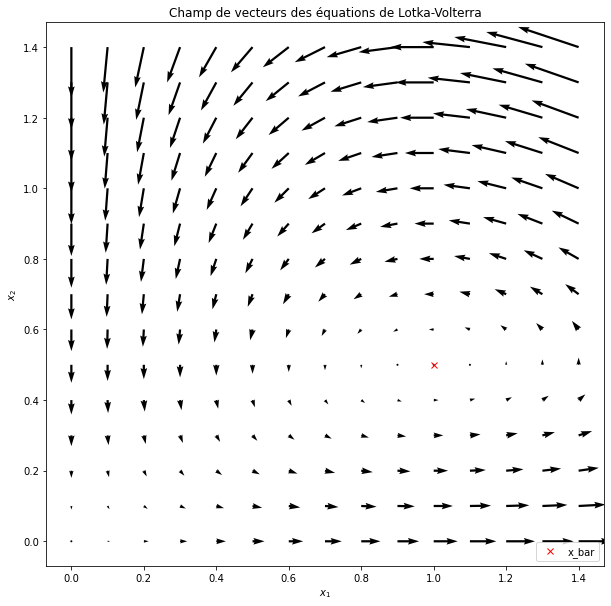

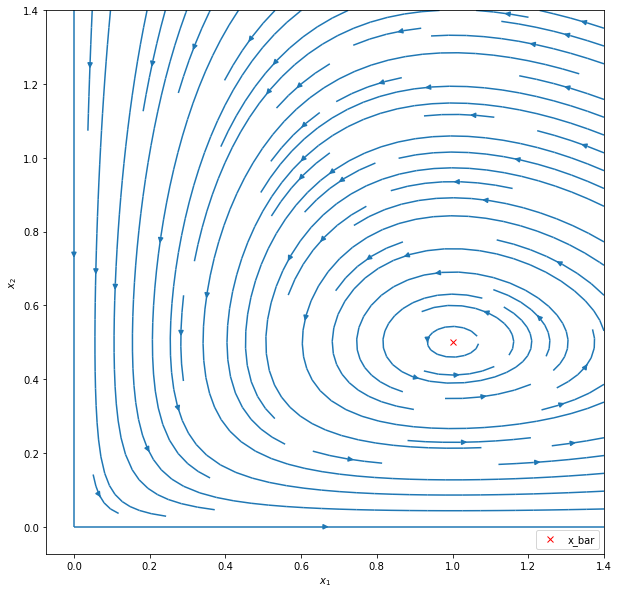

In [2]:
alpha = 2/3 
beta = 4/3
gamma = 1
delta = 1


def f(X) :
    x1 = X[0]
    x2 = X[1]
    return np.array([x1*(alpha - beta*x2), -x2*(gamma-delta*x1)])



x = np.arange(0, 1.5, 0.1)
y = np.arange(0, 1.5, 0.1)

Tab = np.meshgrid(x, y)



U = f(Tab)[0]
V = f(Tab)[1]

ax = plt.axes()
ax.quiver(x, y, U, V)
plt.plot(1, 0.5, 'xr', label = "x_bar")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc = 4)
plt.title("Champ de vecteurs des équations de Lotka-Volterra")
plt.show()

plt.streamplot(x, y, U, V)
plt.plot(1, 0.5, 'xr', label = "x_bar")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc = 4)
plt.show()

On calcule pour nos valeurs de $\alpha$, $\beta$, $\gamma$ et $\delta$ choisies, les coordonnées du point $\bar{x}$. On obtient : $$\bar{x}_1 = 1$$
$$\bar{x}_2 = 0.5$$

On remarque alors que le champ de vecteur *tourne autour* du point $\bar{x}$. On intuite donc que **ce point va être stable.** Plus généralement, **on suppose que les solutions intialisées sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sont périodiques.**

Pour le point $(0, 0)$, notre raisonnement effectué à la question 1 se confirme : lorsque le nombre de prédateurs tombe à zéro et qu'il y a un nombre non-nul de proies, le nombre de proies augmente de plus en plus vite (les flèches du champ de vecteurs sont de plus en plus grandes).

#### 3. Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ sur son ensemble de définition.

Commençons par montrer que le **théorème de Cauchy-Lipschitz** s'applique pour cette équation différentielle.

Déjà, la fonction $f:\mathbb{R}^2 \longrightarrow \mathbb{R}^2$ est **continue**. Puis $f$ est différentiable sur $\mathbb{R}^2$ et sa différentielle vérifie :

$$\forall (x_1,x_2) \in \mathbb{R}^2, J_f(x_1,x_2) = \begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1\\
\delta x_2 & x_1 \delta - \gamma\\
\end{pmatrix}$$

On remarque que $(x_1,x_2) \mapsto J_f(x_1,x_2)$ est continue (car polynomiale), donc **f est continûment différentiable**.

Ainsi, le théorème de Cauchy-Lipschitz s'applique, donc **pour tout $(t_0, x_0) \in \mathbb{R} \times \mathbb{R}^2$, il existe une unique solution maximale $y:I \longrightarrow \mathbb{R}^2$ dans $S_f(t_0, x_0)$**.

Désormais, on notera $y_0:I \longrightarrow \mathbb{R}^2$ une solution maximale initialisée à $t_0$ en $x_0$ $\in \mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

**Par l'absurde, supposons que cette solution ne reste pas dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.** Alors, par continuité d'une solution d'une équation différentielle, $\exists t_1 \in I,\exists x_1 \in \mathbb{R}, f(t_1) = (x_1,0)$ ou $\exists x_2 \in \mathbb{R}, f(t_1) = (0,x_2)$. Sans perte de généralité, on se place dans le premier cas. De cette manière, $y_0$ vérifie le problème de Cauchy associé à la valeur initiale $(t_1, (x_1,0))$.

Posons maintenant
$$\begin{array}{ccc}
y_1&:&\mathbb{R} & \longrightarrow & \mathbb{R}^2\\
&&t & \longmapsto & \begin{pmatrix}
x_1\exp(t-t_1)\\
0
\end{pmatrix}
\end{array}$$

qui vérifie elle aussi le problème de Cauchy associé à la valeur initiale $(t_1,(x_1, 0))$. $y_1$ n'atteint jamais $x_0$ (car la deuxième composante ne peut jamais être strictement positive), donc *a fortiori* les deux solutions $y_0$ et $y_1$ sont **distinctes**. Elles sont de plus **maximales** (par définition pour $y_0$ et par construction pour $y_1$ car son ensemble de définition est $\mathbb{R}$).

Cependant, les deux solutions vérifient le **même problème de Cauchy**, ce qui **contredit l'unicité des solutions maximales**, d'où contradiction.

**On conclut donc qu'une solution initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ reste dans cet ensemble sur son ensemble de définition.**

#### 4. On considère la fonction : $$H(x_1, x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2$$ définie sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est définie sur $\mathbb{R}$ et que $\bar{x}$ est stable.

Soit $(x_1,x_2)$ une solution initialisée sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, définie sur $I$. Remarquons que, par la question 3, la fonction $t \mapsto H \circ (x_1,x_2)(t)$ est bien définie sur $I$ entier.

Soit $t \in I$:
$$\begin{array}{rcl}
(H \circ x)'(t) & = & \displaystyle \dot x_1(t)(\delta - \frac{\gamma}{x_1(t)}) + \dot x_2(t)(\beta - \frac{\alpha}{x_2(t)})\\
&=&\displaystyle x_1(t)(\alpha - \beta x_2(t))(\delta - \frac{\gamma}{x_1(t)}) - x_2(t)(\gamma - \delta x_1(t))(\beta - \frac{\alpha}{x_2(t)})\\
&=& 0
\end{array}$$
(la deuxième ligne est justifiée, car $(x_1,x_2)$ est solution de l'équation de Lotka-Volterra).

**La fonction $t \mapsto (H \circ x)(t)$ est donc constante sur $I$**. Désormais, on suppose que $(x_1,x_2)$ est maximale.

**Par l'absurde**, supposons que $I \neq \mathbb{R}$ (*i.e.* que la solution n'est pas définie sur $\mathbb{R}$ entier, donc qu'elle n'est pas globale). Alors on sait par le **théorème du domaine maximal d'existence** que $I = \left]t_-, t_+\right[$ avec (sans perte de généralité par rapport au cas général) :

$$\left\{
    \begin{array}{rcl}
    t_- &\in& \mathbb{R}\\
    t_+ &\in& \mathbb{R} \cup \left\{ -\infty, +\infty\right\}
    \end{array}
    \right.$$

De plus, comme la fonction $f$ est définie pour tout $x \in \mathbb{R}^2$ et pour tout $t \in \mathbb{R}$ (l'équation différentielle est autonome), avoir $\displaystyle \lim_{t \rightarrow t_-} d( (t, x(t)), \partial(\mathbb{R} \times \mathbb{R}^2)) = 0$ est impossible, donc on a nécessairement :

$$\lim_{t \rightarrow t_-}||x(t)|| = + \infty$$

De cette manière, $t \mapsto x_1(t)$ ou $t \mapsto x_2(t)$ est **non-bornée** (dans le cas contraire, $x$ serait elle aussi bornée). Sans perte de généralité, supposons qu'il s'agisse de $x_1$.

Posons
$$\begin{array}{rrll}
\psi & : & \mathbb{R}_+^* & \rightarrow & \mathbb{R}\\
&& x & \mapsto & \beta x - \alpha \ln x
\end{array}
$$
et
$$\begin{array}{rrll}
\theta & : & \mathbb{R}_+^* & \rightarrow & \mathbb{R}\\
&& x & \mapsto & \delta x - \gamma \ln x
\end{array}
$$

D'une part, $\psi$ est dérivable sur $\mathbb{R}_+^*$ de dérivée $\psi'(x)=\beta-\dfrac{\alpha}{x}$. Une rapide étude de fonction fournit que :

* $\psi$ est strictement décroissante sur $\left\rbrack0, \dfrac{\alpha}{\beta}\right\lbrack$
* $\psi$ est strictement croissante sur $\left\rbrack\dfrac{\alpha}{\beta}, +\infty\right\lbrack$

Ainsi, **$\psi$ admet un minimum $m_\psi$ atteint uniquement en $\dfrac{\alpha}{\beta}$** (un résultat analogue peut être établi pour $\theta$)

On notera par la suite $H^*$ la valeur constante de $H$, de telle sorte que :
$$\forall t \in I,\space(\theta \circ x_1)(t)) \leq H^* - m_\psi$$

D'autre part, on remarque que $\displaystyle \lim_{x \rightarrow + \infty} \theta(x)=+ \infty$. Comme $t \mapsto x_1(t)$ est non-bornée, $t \mapsto (\theta \circ x)(t)$ est donc elle aussi **non-bornée**, ce qui contredit l'inégalité ci-dessus. **D'où contradiction**.

Ainsi, **toute solution maximale initialisée dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ est globale, *i.e.* est définie sur $\mathbb{R}$**

Enfin,
* $f: \mathbb{R}^2 \longrightarrow \mathbb{R}^2$ est **continue**;
* $\bar{x}$ est un **point d'équilibre** (question 1);
* $V: (x_1,x_2) \mapsto H(x_1,x_2) - H(\bar x)=(\theta(x_1) - m_\theta) + (\psi(x_2) - m_\psi)$ :
  * vaut **0 en $\bar x$** (par construction)
  * est **strictement positive en tous les autres points** (par unicité du minimum de $x \mapsto \theta(x)$ et de $x \mapsto \psi(x)$)

et
$$\forall t \in \mathbb{R},\space\dfrac{\text{d}}{\text{d}t}(V \circ x)(t) = \dfrac{\text{d}}{\text{d}t}(H \circ x)(t) = 0 \leq 0$$

**Par la caractérisation par la fonction de Lyapunov, $a$ est stable.**

#### 5. Représenter les courbes de niveau de $H$.

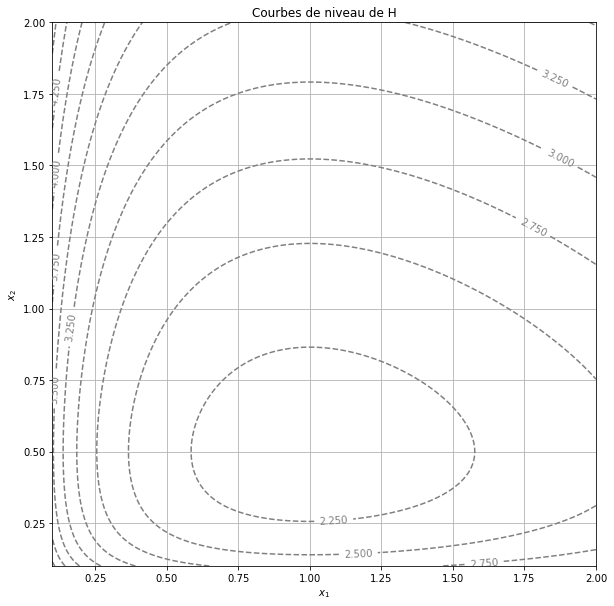

In [3]:
from math import log2
import autograd
import autograd.numpy as anp


def display_contour(f, x, y, levels):
    X, Y = anp.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")


def H(x1, x2):
    x1 = anp.array(x1)
    x2 = anp.array(x2)
    y = delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)
    return y


display_contour(
    H, 
    x=anp.linspace(0.1, 2.0, 200), 
    y=anp.linspace(0.1, 2.0, 200), 
    levels=10 
)

plt.title("Courbes de niveau de H")
plt.show()

#### Qu'en conclue-t-on sur le comportement des solutions ?
Soit $x$ une solution, et $H_0 := H(x(0))$. On sait que $\dfrac{\text{d}}{\text{d}t} (H \circ x)(t) = 0$, donc pour tout $t,\space x(t)$ se trouve sur la courbe de niveau $c=H_0$ de la fonction $H$.

Nous pouvons donc conclure qu'une solution donnée $x$ ne peut prendre ses valeurs que sur une seule de ces courbes qui sont intuitivement "fermées" et "quasiment elliptiques", et ne pourra en aucun cas en sortir. En particulier, **une solution non initialisée en $\bar x$ ne peut pas converger vers le point d'équilibre stable $\bar x$, *ie* $\bar x$ n'est ni globalement, ni localement attractif**.

#### 6. Coder une fonction du type `def solve_euler_explicit(f, x0, dt, t0, tf)` prenant en entrée une fonction $f : \mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps intiaux et finaux ; et renvoyant les vecteurs des temps $t_j$ et des solutions $x_j$ du schéma d'Euler explicite appliqué à $\dot{x} = f(t, x)$.

In [4]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    tj = t0
    xj = x0

    T = [t0]
    X = [x0]


    while (tj < tf):
        # Calcul xj+1; et on ajoute xj+1 à la liste.
        # Avec <, on est sûrs de ^pas aller trop loin
        xj1 = xj + dt*f(tj, xj)
        X.append(xj1)
        xj = xj1

        tj = tj + dt
        T.append(tj)


    return np.array(T), np.array(X)

#### La tester sur une équation diférentielle aux solutions exactes connues.

On choisi l'équation différentielle : 

$$\left \{
   \begin{array}{r c l}
      \dot{x} = x \\
      t_0 = 0 \\
      x_0 = 1
   \end{array}
   \right .$$

La solution exacte est : $$x(t) = \exp{t}$$

On trace alors sur le même graphe la solution du schéma d'Euler explicite (en bleu) et la solution exacte (en pointillés rouges).

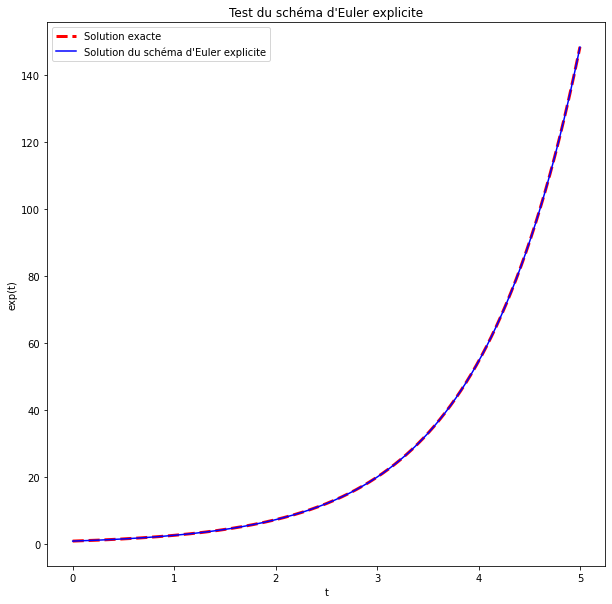

In [5]:
def f(t, x) :
    return x

x0 = 1
dt = 1e-4
t0 = 0
tf = 5

Sol = solve_euler_explicit(f, x0, dt, t0, tf)

sol_t = Sol[0]
sol_x = Sol[1]

#solution explcicite
def expo(t) :
    return np.exp(t)

sol_x_ex = expo(sol_t)

plt.plot(sol_t, sol_x_ex, '--r', linewidth = 3, label = "Solution exacte")
plt.plot(sol_t, sol_x, 'b', label = "Solution du schéma d'Euler explicite")
plt.xlabel("t")
plt.ylabel("exp(t)")
plt.title("Test du schéma d'Euler explicite")
plt.legend()
plt.show()

#### Vérifier la convergence du schéma lorsque $dt$ tent vers $0$.

On fait tendre $dt$ vers $0$ et on visualise les courbes des solutions du schéma d'Euler pour les différents $dt$ (de $1$ à $10^{-3}$). 

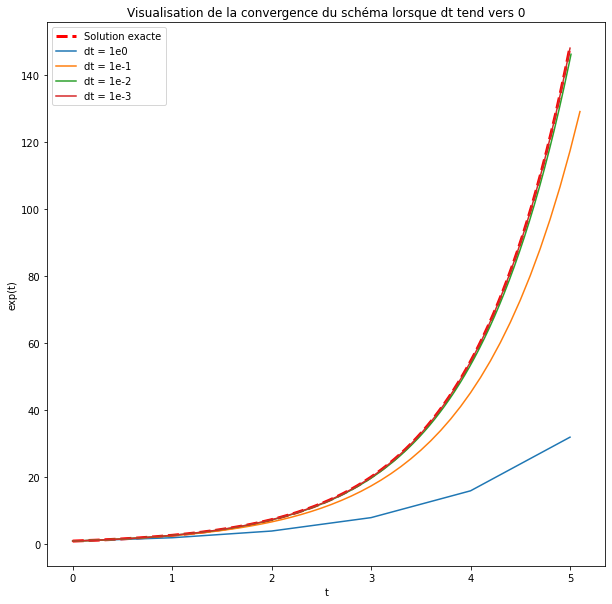

In [6]:
sol_x_ex = expo(sol_t)
plt.plot(sol_t, sol_x_ex, '--r', linewidth = 3, label = "Solution exacte")

for i in range(0, 4) :
    dt = 10**(-i)
    Sol = solve_euler_explicit(f, x0, dt, t0, tf)

    sol_t = Sol[0]
    sol_x = Sol[1]

    legend = "dt = 1e" + str(-i)
    plt.plot(sol_t, sol_x, label = legend)
    plt.legend()

    
plt.xlabel("t")
plt.ylabel("exp(t)")
plt.title("Visualisation de la convergence du schéma lorsque dt tend vers 0")
plt.show()

#### Comment visualiser graphiquement l'ordre de convergence ?
Pour visualiser l'ordre de convergence, on revient à la définition et on trace les courbes suivantes :
* d'une part $\Lambda(\Delta t) := \displaystyle \max_{j}\|x^j-x(t_j)\|$
* d'autre part $\Gamma(\Delta t):= c\times(\Delta t)^1$ (le schéma d'Euler est un schéma d'ordre 1), où $c$ est une constante (indépendante de $\Delta t$) permettant de vérifier l'inégalité $\Lambda \leq \Gamma$.
 
On tracera ces courbes pour quelques valeurs de $\Delta t$. On tracera aussi la courbe $\Phi(\Delta t) := c' \times (\Delta t)^2$ pour vérifier qu'elle ne pourra jamais majorer $\Lambda$, quelque soit la constante choisie.

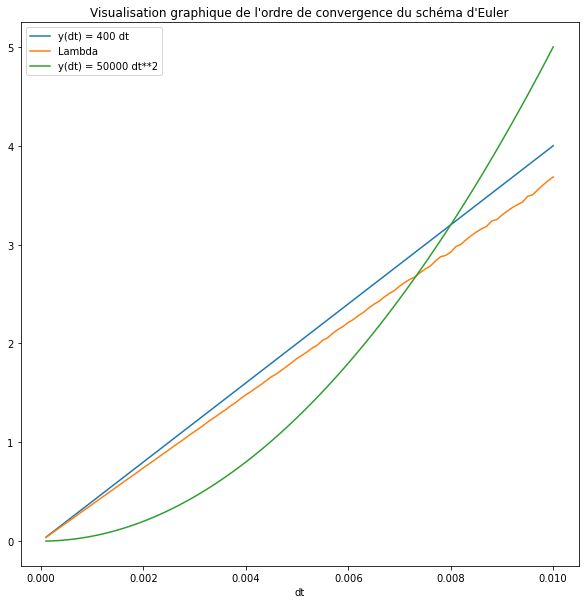

In [7]:
Dt = np.linspace(0.0001, 0.01, 100)
Gamma = []
Lambda = []
Phi = []

def trouver_max(sol_ex, sol_approch):
    max = -1
    longueur = sol_approch.shape[0]
    
    for t in range(longueur):
        value = abs(sol_ex[t] - sol_approch[t])
        if(value > max):
            max = value
    
    return max

for dt in Dt :
    Sol = solve_euler_explicit(f, x0, dt, t0, tf)
    sol_t = Sol[0]
    sol_approch = Sol[1]
    sol_ex = expo(sol_t)
    
    Lambda.append(trouver_max(sol_ex, sol_approch))
    Gamma.append(dt)
    Phi.append(dt**2)

Gamma = np.array(Gamma)
Lambda = np.array(Lambda)
Phi = np.array(Phi)

Gamma *= 400
Phi *= 50000

plt.plot(Dt, Gamma, label="y(dt) = 400 dt")
plt.plot(Dt, Lambda, label="Lambda")
plt.plot(Dt, Phi, label="y(dt) = 50000 dt**2")
plt.legend()
plt.xlabel("dt")
plt.title("Visualisation graphique de l'ordre de convergence du schéma d'Euler")
plt.show()

#### 7. Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on au temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l'évolution de la fonction $H$.

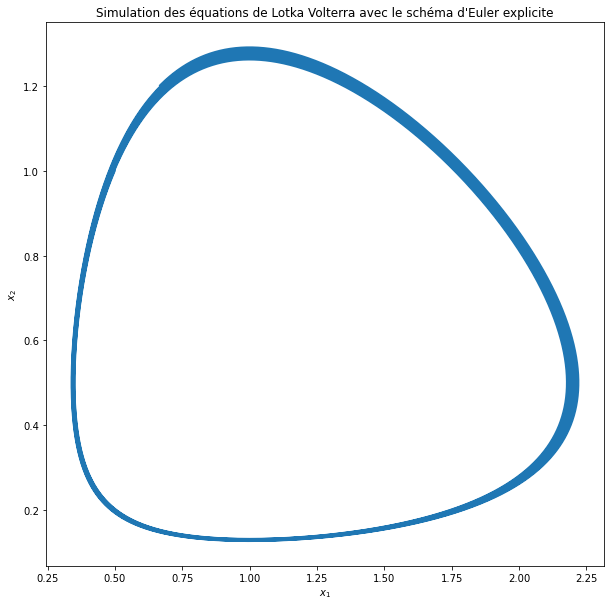

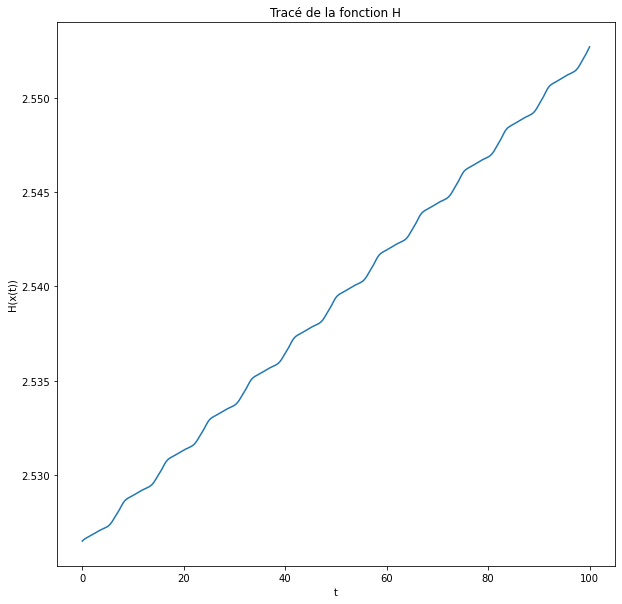

In [8]:
alpha = 2/3 
beta = 4/3
gamma = 1
delta = 1


def Lotka_Volterra(t, X) :
    x1 = X[0]
    x2 = X[1]
    return (np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)]))

x0 = np.array([0.5, 1])
dt = 1e-3
t0 = 0
tf = 100

Sol_euler_exp = solve_euler_explicit(Lotka_Volterra, x0, dt, t0, tf)

Sol_t = Sol_euler_exp[0]
Sol_x = Sol_euler_exp[1]


#fonction H

def H(X) :
    x1 = Sol_x[:,0]
    x2 = Sol_x[:,1]
    
    return(delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2))


plt.plot(Sol_x[:,0], Sol_x[:,1])
plt.title("Simulation des équations de Lotka Volterra avec le schéma d'Euler explicite")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()


plt.plot(Sol_t, H(Sol_x))
plt.title("Tracé de la fonction H")
plt.xlabel("t")
plt.ylabel("H(x(t))")
plt.show()

On remarque qu'au temps long, la solution calculée ne se superpose pas correctement, alors qu'elle devrait être parfaitement périodique. Nous avons cependant choisi un pas de temps assez petit pour que ça ne se voit pas beaucoup à l'oeil nu, mais seulement en zommant. De plus, la fonction $H$ devrait normalement être constante au cours du temps (question 4 : $\dfrac{\text{d}H \circ x}{dt} = 0$), or ce n'est clairement pas le cas ici. Cette résolution ne semble donc pas fidèle à la réalité.

#### 8. Coder maintenant une fonction du type `def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100)` donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x} = f(t, x)$.

In [9]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    tj = t0
    xj = x0

    T = [t0]
    X = [x0]
    
    while (tj < tf):
        # Calcul xj+1; et on ajoute xj+1 à la liste.
        # Avec <, on est sûrs de pas aller trop loin

        
        xj1 = trouver_suiv(f, tj, xj, dt, itermax)
        
        if xj1 != "stop" :
            X.append(xj1)
            xj = xj1

            tj = tj + dt
            T.append(tj)
            
        else :
            return "No convergence found"

        
    return np.array(T), np.array(X)

'''
Calcul de la fonction phi dans le cas de Euler implicite selon la méthode du cours
'''
def trouver_suiv(f, tj, xj, dt, itermax, epsilon = 0.1):
    def F(x):
        return xj + dt*f(tj + dt, x)
    
    u0 = xj + dt*f(tj, xj)
    k = 0
    uk = u0
    
    test = 0

    while k < itermax:
        suiv = F(uk)
        
        test = (np.linalg.norm(suiv - uk)) / np.linalg.norm(u0)
        
        if( (np.linalg.norm(suiv - uk)) / np.linalg.norm(u0) <= epsilon):
            return suiv
        
        uk = suiv
        k+=1

    print(test)
    return ("stop")

#### Vérifier de nouveau sa convergence sur des solutions connues.

On reprend l'équation différentielle $\dot{x} = x$ pour tester `solve_euler_implicit`.

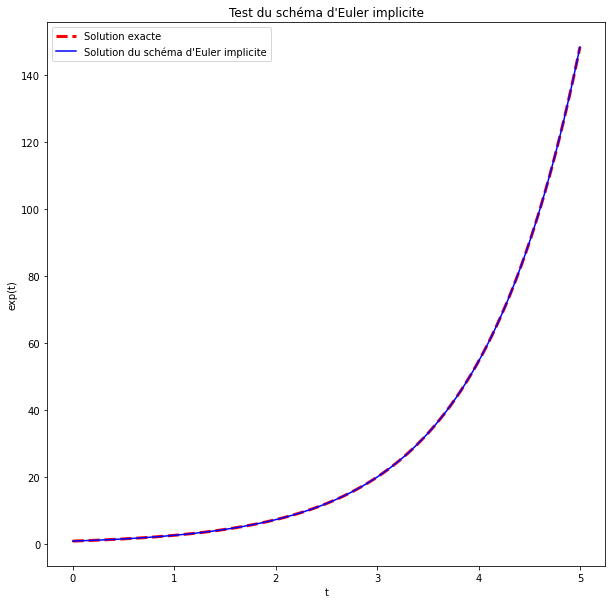

In [10]:
def f(t, x) :
    return x

x0 = 1
dt = 1e-4
t0 = 0
tf = 5

Sol = solve_euler_implicit(f, x0, dt, t0, tf)

sol_t = Sol[0]
sol_x = Sol[1]

#solution explicite
def expo(t) :
    return np.exp(t)

sol_x_ex = expo(sol_t)


plt.plot(sol_t, sol_x_ex, '--r', linewidth = 3, label = "Solution exacte")
plt.plot(sol_t, sol_x, 'b', label = "Solution du schéma d'Euler implicite")
plt.xlabel("t")
plt.ylabel("exp(t)")
plt.title("Test du schéma d'Euler implicite")
plt.legend()
plt.show()

#### Que se passe-t-il cette fois si sur les équations de Lotka-Volterra ?

<ipython-input-9-043c6b78a34a>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xj1 != "stop" :


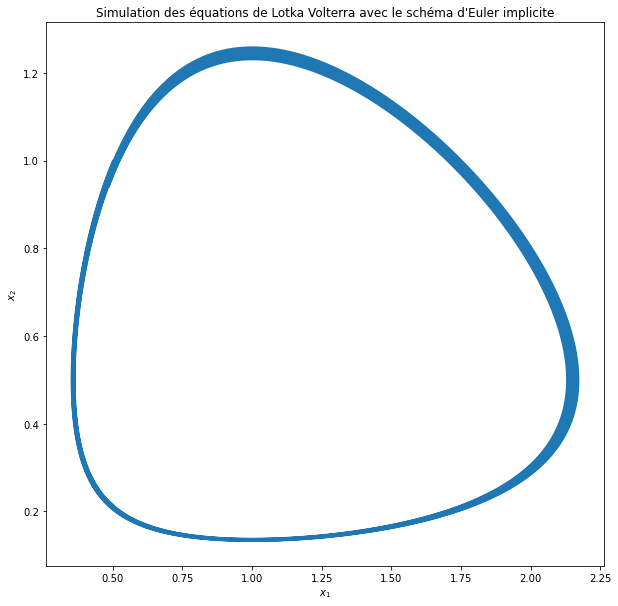

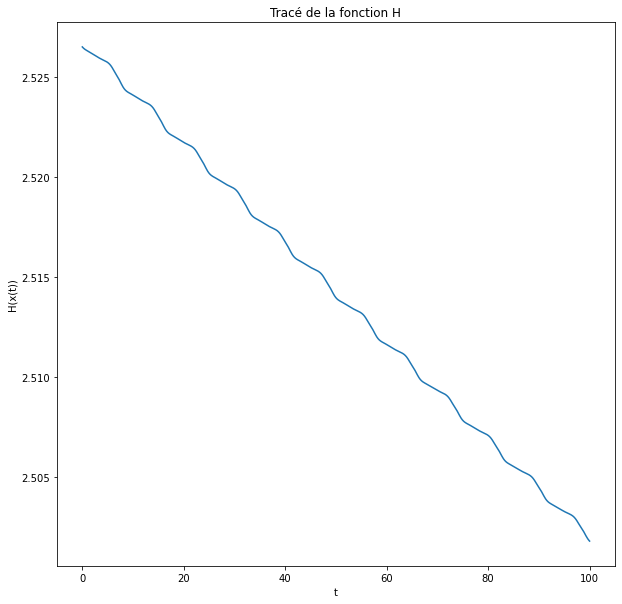

In [11]:
alpha = 2/3 
beta = 4/3
gamma = 1
delta = 1


def Lotka_Volterra(t, X) :
    x1 = X[0]
    x2 = X[1]
    return (np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)]))

x0 = np.array([0.5, 1])
dt = 1e-3
t0 = 0
tf = 100

Sol_euler_imp = solve_euler_implicit(Lotka_Volterra, x0, dt, t0, tf, 100)


if Sol_euler_imp == "No convergence found" :
    print("No convergence found")

else :

    Sol_t_imp = Sol_euler_imp[0]
    Sol_x_imp = Sol_euler_imp[1]

#fonction H

    def H1(X) :
        x1 = X[:,0]
        x2 = X[:,1]
    
        return(delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2))


    plt.plot(Sol_x_imp[:,0], Sol_x_imp[:,1])
    plt.title("Simulation des équations de Lotka Volterra avec le schéma d'Euler implicite")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()
    
    

    plt.plot(Sol_t_imp, H1(Sol_x_imp))
    plt.title("Tracé de la fonction H")
    plt.xlabel("t")
    plt.ylabel("H(x(t))")
    plt.show()

Cette fois-ci, la résolution n'est toujours pas concluante : $H$ n'est pas constante au cours du temps et la solution ne se superpose pas parfaitement lorsque l'on zoome, comme pour Euler explicite.

#### 9. Expliquer pourquoi les solutions de $$\dot{x}_1 = x_1(\alpha - \beta x_2) - u_1(x_1, x_2)(H(x_1, x_2) - H_0)$$ $$\dot{x}_2 = -x_2(\gamma - \delta x_1) - u_2(x_1, x_2)(H(x_1, x_2) - H_0)$$ sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u : \mathbb{R}^2 \to \mathbb{R}^2$ continûment différentiable.

Soit $u:\mathbb{R}^2 \longrightarrow \mathbb{R}^2$ continûment différentiable.

**On se place dans toutes les questions suivantes avec des solutions maximales initialisées dans $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ pour que $H \circ x$ soit bien définie.**

Appelons $(E)$ le système d'équations de Lotka-Volterra et $(E')$ ce nouveau système d'équations. Montrons alors que $x$ est solution de $(E)$ ssi $x$ est solution de $(E')$.

$\Rightarrow$ Soit $x$ solution de $(E)$. Par la question 4, $t \mapsto (H \circ x)(t)$ est constante, égale à $(H \circ x)(0)=H_0$. Donc **$x$ vérifie le système $(E')$.**

$\Leftarrow$ Réciproquement, soit $x$ solution de $(E')$. Posons $y$ la solution de $(E)$ muni de la condition initiale $(0, x(0))$. Par le sens direct, $y$ est aussi solution de $(E')$, avec la condition initiale $(0, x(0))$. **$x$ et $y$ vérifient donc le même problème de Cauchy**. Or,

$$
\begin{array}{rrll}
g & : & \mathbb{R}_{>0} \times \mathbb{R}_{>0} & \rightarrow & \mathbb{R}^2\\
&&(x_1, x_2) & \mapsto & f(x_1, x_2) - (H(x_1, x_2) - H_0) \cdot u(x_1, x_2)
\end{array}
$$

est continue et continûment différentiable sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$, donc il y a **unicité des solutions maximales au problème de Cauchy $(E')$ muni de la condition initiale $(0, x(0))$** (théorème de Cauchy-Lipschitz). Ainsi, $x=y$, et donc *a fortiori* **$x$ est solution de $(E)$.**


#### 10. Soit $H_0 \in \mathbb{R}$. Calculer la dérivée de $H - H_0$ le long des solution de ce nouveau système.

On calcule $\frac{d(H(x(t)) - H_0)}{dt}$.
$$\frac{d(H(x(t)) - H_0)}{dt} = \delta \dot{x}_1 - \delta \frac{\dot{x}_1}{x_1} + \beta \dot{x}_2 - \alpha \frac{\dot{x}_2}{x_2}$$

On dérive le long des solutions du nouveau système, on remplace donc $\dot{x}_1$ et $\dot{x}_2$ dans la dérivée de $H$.
$$\frac{d(H(x(t)) - H_0)}{dt} = [ x_1(\alpha - \beta x_2) - u_1(x_1, x_2)(H(x(t)) - H_0)] \left [\delta - \frac{\gamma}{x_1} \right ] + [ -x_2(\gamma - \delta x_1) - u_2(x_1, x_2)(H(x(t)) - H_0)] \left [\beta - \frac{\alpha}{x_2} \right ]$$


$$\frac{d(H(x(t)) - H_0)}{dt} = (H(x(t)) - H_0) \left [ u_1(x_1, x_2)(\frac{\gamma}{x_1} \,- \delta \,) +  u_2(x_1, x_2)(\frac{\alpha}{x_2}\, - \beta \,) \right ]$$

#### Montrer que l'on peut choisir $u$ tel que $$\frac{d(H(x(t)) - H_0)}{dt} = -k \| \nabla H(x(t)) \|^2(H(x(t)) - H_0) $$

On calcule dans un premier temps $\nabla H(x(t))$ puis $\| \nabla H(x(t)) \|^2$. On a : 
$$\nabla H(x(t)) =
\begin{pmatrix}
    \delta - \frac{\gamma}{x_1} \\
    \beta - \frac{\alpha}{x_2}
\end{pmatrix}
\\ \| \nabla H(x(t)) \|^2 = \left ( \delta - \frac{\gamma}{x_1} \right )^2 + \left ( \beta - \frac{\alpha}{x_2} \right )^2 $$
Soit $k \in \mathbb{R}$. On pose : $$u(x_1, x_2) := -k
\begin{pmatrix}
    \frac{\gamma}{x_1} - \delta \\
    \frac{\alpha}{x_2} - \beta
\end{pmatrix}
 = k \nabla H(x(t))$$
 qui est continûment différentiable sur $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$. On a alors :
$$\left [ u_1(x_1, x_2)(\frac{\gamma}{x_1} \,- \delta \,) +  u_2(x_1, x_2)(\frac{\alpha}{x_2}\, - \beta \,) \right ] = -k \, \| \nabla H(x(t)) \|^2$$
 On a donc trouvé une fonction $u$ telle que : $$\frac{d(H(x(t)) - H_0)}{dt} = -k \| \nabla H(x(t)) \|^2(H(x(t)) - H_0) $$

#### En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini si $x$ reste à une distance strictement positive de $\bar{x}$.

Commençons par montrer que, sous ces hypothèses,

$$\exists c > 0, \forall t \in \mathbb{R}, \|\nabla H(x(t))\| \geq c$$

$x$ reste à une distance strictement positive de $\bar x$, donc fixons $e > 0$ tel que :

$$\forall t \in \mathbb{R}, \|x(t)- \bar x\| \geq e$$

Soit $t \in \mathbb{R}$. Alors :

$$\left|x_1(t)- \dfrac{\gamma}{\delta}\right|^2 + \left|x_2(t) - \dfrac{\alpha}{\beta}\right|^2 \geq e^2$$

donc nécessairement nous avons l'une des deux situations suivantes :

$$
\left\{
\begin{array}{c}
\left|x_1(t)- \dfrac{\gamma}{\delta}\right|^2 \geq \dfrac{e^2}{2}\\
\left|x_2(t) - \dfrac{\alpha}{\beta}\right|^2 \geq \dfrac{e^2}{2}
\end{array}
\right.
$$

On se place dans le premier cas (le deuxième se traite de la même manière). On suppose de plus que $x_1(t) > \dfrac{\gamma}{\delta}$ (l'autre cas se traite lui aussi de la même manière) de telle sorte que :

$$
x_1(t)- \dfrac{\gamma}{\delta} \geq \dfrac{e}{\sqrt{2}}
$$

que l'on réécrit :

$$
x_1(t) \geq \dfrac{\gamma}{\delta} + \dfrac{e}{\sqrt{2}} := l > \dfrac{\gamma}{\delta}
$$

Posons $\psi : x \in \mathbb{R}_+^* \longmapsto \delta - \dfrac{\gamma}{x}$. Une rapide étude montre qu'elle est strictement croissante sur $\mathbb{R}_+^*$, d'où :

$$
\psi(x_1(t)) \geq \psi(l) > \psi(\dfrac{\gamma}{\delta}) = 0
$$

Remarquons maintenant que :

$$
\begin{array}{rcl}
\|\nabla H(x(t))\|^2 &=& \left|\delta - \dfrac{\gamma}{x_1(t)}\right|^2 + \left|\beta - \dfrac{\alpha}{x_1(t)}\right|^2\\
&\geq&\psi(l)^2
\end{array}
$$

(on reconnaît la définition de $\psi$).

**Par la suite, on choisit $c$ le minimum des 4 constantes de la forme de $\psi(l)$ trouvées dans chacun des 4 cas, fournissant ainsi une constante indépendante de $t$**

D'où : **$\|\nabla H(x(t))\| \geq c > 0$, et ce pour tout $t$.**

On en déduit que :

$$
\dfrac{\text{d}}{\text{d}t}((H \circ x )(t) - H_0) \leq -kc^2((H \circ x)(t) - H_0)
$$

En posant $h : t \in \mathbb{R} \longmapsto (H \circ x )(t) - H_0$, on a pour tout $t$ tel que $h(t) \neq 0$,

$$
\dfrac{h'(t)}{h(t)} \leq -kc^2
$$

donc en intégrant, $\ln(\left|h(t)\right|) \leq -kc^2t + \mu$, d'où :

$$
\left|(H \circ x )(t) - H_0\right| \leq \lambda\exp(-kc^2t)
$$

Donc **$t \longmapsto (H \circ x)(t)$ converge exponentiellement vers $H_0$** (car $-kc^2 < 0$)

#### 11. En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x^{j+1}) - H(x_0)$ en fonction de $H(x^j) - H(x_0)$ au premier ordre en $dt$.

Par la question 9, résoudre le nouveau système avec une fonction $u$ bien choisie donne des résultats identiques à ceux des équations de Lotka-Volterra.

Pour assurer la stabilité de $H$ (*ie* que la fonction simulée reste proche de $H_0$, la valeur constante qu'elle est théoriquement censée prendre), on choisit de prendre $u(x):=k\nabla H(x)$ comme l'indique le résultat de la question 10 ; en effet, celle-ci assure une convergence exponentielle de $t \mapsto (H \circ x)(t)$ vers $H_0$.

**On change donc notre schéma d'Euler pour qu'il résolve l'équation $\dot x = g(x)$**, avec :

$$
\begin{array}{rrll}
g & : & \mathbb{R}_{>0} \times \mathbb{R}_{>0} & \rightarrow & \mathbb{R}^2\\
&&(x_1, x_2) & \mapsto & f(x_1, x_2) - (H(x_1, x_2) - H_0) \cdot k\nabla H(x_1, x_2)
\end{array}
$$

Aucun autre changement ne doit être effectué.

Le rôle de $k$ est de déterminer la **vitesse de convergence** de $t \mapsto (H \circ x)(t)$ vers $H_0$ : plus il est grand, plus la convergence est rapide. En première approche, on aimerait pouvoir le choisir aussi grand que l'on veut, pour que la convergence soit la plus rapide possible.

Cependant, $k$ ne peut, en pratique, pas être choisi arbitrairement grand. Pour le montrer, on développe comme suggéré au premier ordre :

$$
\begin{array}{rcl}
H(x^{j+1}) - H_0 & = & (H \circ x)(t^j + dt) - H_0\\
&\approx& (H \circ x)(t^j) + dt(H \circ x)'(t^j) - H_0\\
&=&H(x^j) - H_0 - kdt\|\nabla H (x^j)\|^2(H(x^j) - H_0)\\
&=&(H(x^j) - H_0)(1 - kdt\|\nabla H (x^j)\|^2)
\end{array}
$$

(comme le schéma d'Euler est un schéma d'ordre 1, c'est bien cette approximation qui est effectivement faite en pratique).

Ce développement montre que si $k$ est arbitrairement grand, alors la différence entre $H(x^{j+1})-H_0$ et $H(x^{j})-H_0$ devient elle aussi arbitrairement grande (au premier ordre).

Cela empêche forcément $H$ de se rapprocher de la valeur $H_0$, donc **$k$ ne peut pas être choisi arbitrairement grand, dans l'objectif que nous nous sommes fixés.**

Testons la modification de la résolution.


<ipython-input-9-043c6b78a34a>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xj1 != "stop" :


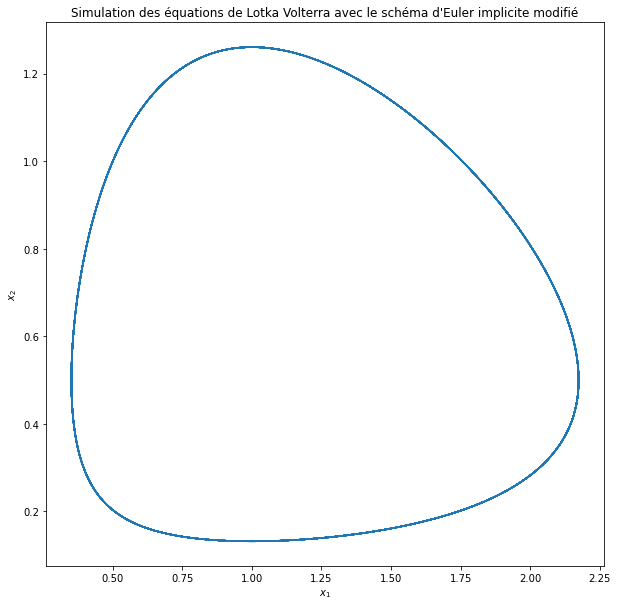

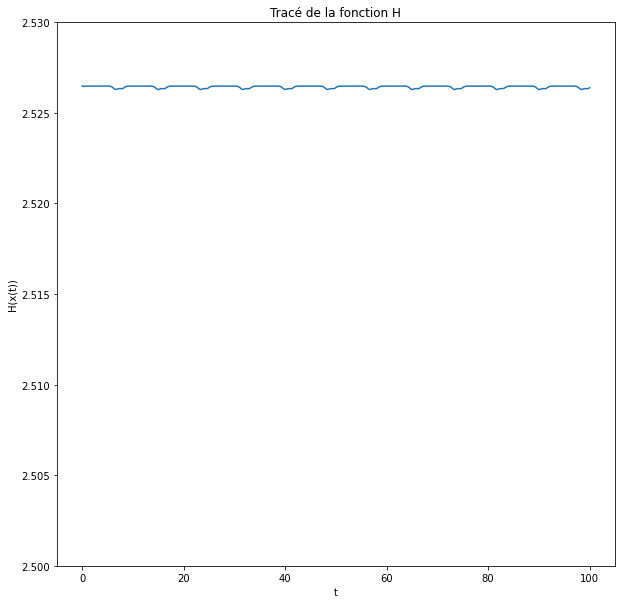

In [12]:
alpha = 2/3 
beta = 4/3
gamma = 1
delta = 1


x0 = np.array([0.5, 1])
dt = 1e-3
t0 = 0
tf = 100
k = 5

def f(t, X) :
    x1 = X[0]
    x2 = X[1]
    return (np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)]))

def H(X) :
    x1 = X[0]
    x2 = X[1]
    
    return(delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2))

def nabla_H(X) :
    x_1 = X[0]
    x_2 = X[1]
    return(np.array([delta - gamma/x_1, beta - alpha/x_2]))

def g(t, X) :
    return(f(t, X)-(H(X)-H(x0))*k*nabla_H(X))




Sol_euler_imp = solve_euler_implicit(g, x0, dt, t0, tf, 100)


if Sol_euler_imp == "No convergence found" :
    print("No convergence found")

else :

    def H1(X) :
        x1 = X[:,0]
        x2 = X[:,1]
    
        return(delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2))
    
    Sol_t_imp = Sol_euler_imp[0]
    Sol_x_imp = Sol_euler_imp[1]

        
    plt.plot(Sol_x_imp[:,0], Sol_x_imp[:,1])
    plt.title("Simulation des équations de Lotka Volterra avec le schéma d'Euler implicite modifié")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()
    
    plt.plot(Sol_t_imp, H1(Sol_x_imp))
    plt.title("Tracé de la fonction H")
    plt.xlabel("t")
    plt.ylabel("H(x(t))")
    plt.ylim(2.5, 2.53)
    plt.show()

    
    

   

On remarque maintenant qu'avec le même pas $dt$ que précédemment, on n'a plus le problème de décalage des solutions calculées avec le schéma d'Euler implicite. De plus, en gardant la même échelle sur l'axe des $y$ que précédemment lors du tracé de $H(x(t))$, on obtient à peu près une droite horizontale. On teste également différentes valeurs de $k$.

<ipython-input-9-043c6b78a34a>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xj1 != "stop" :
<ipython-input-9-043c6b78a34a>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xj1 != "stop" :
<ipython-input-9-043c6b78a34a>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xj1 != "stop" :


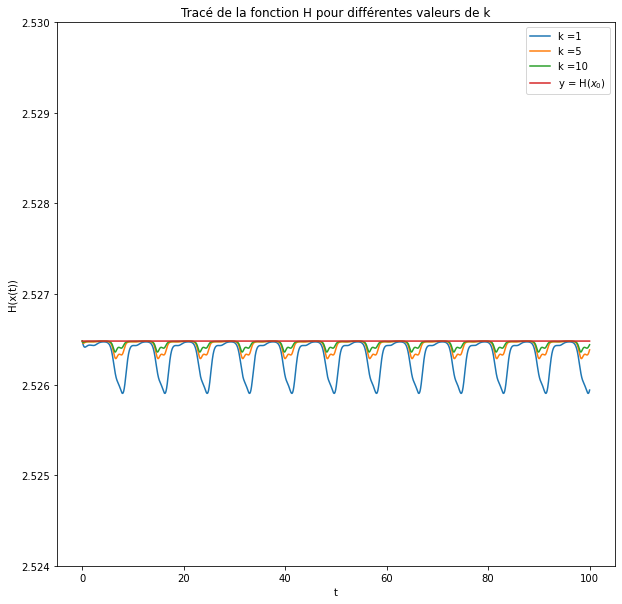

In [13]:
K = [1, 5, 10]

for k in K :
    Sol_euler_imp = solve_euler_implicit(g, x0, dt, t0, tf, 100)


    if Sol_euler_imp == "No convergence found" :
        print("No convergence found")

    else :
    
        Sol_x_imp = Sol_euler_imp[1]
        
        leg = "k =" + str(k)
        
        plt.plot(Sol_t_imp, H1(Sol_x_imp), label = leg)
        plt.legend()

        
long = np.shape(Sol_t_imp)[0]
H_x0 = np.array([H(x0) for k in range(0, long)])
        
        
plt.plot(Sol_t_imp, H_x0, label = "y = H($x_0$)")
plt.legend()
        

plt.title("Tracé de la fonction H pour différentes valeurs de k")
plt.xlabel("t")
plt.ylabel("H(x(t))")
plt.ylim(2.524, 2.53)
plt.show()
    
    

On remarque alors qu'en augmentant (légérement) $k$, la fonction $H$ se rapproche de plus en plus de la droite horizontale égale à $H(x_0)$. Pour le voir, nous avons zoomé l'échelle par rapport aux graphes précédents.